In [20]:
import pandas as pd
import numpy as np
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

Data types in 'indu' dataframe:
Time     datetime64[ns]
Value             int64
dtype: object

Data types in 'cons' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


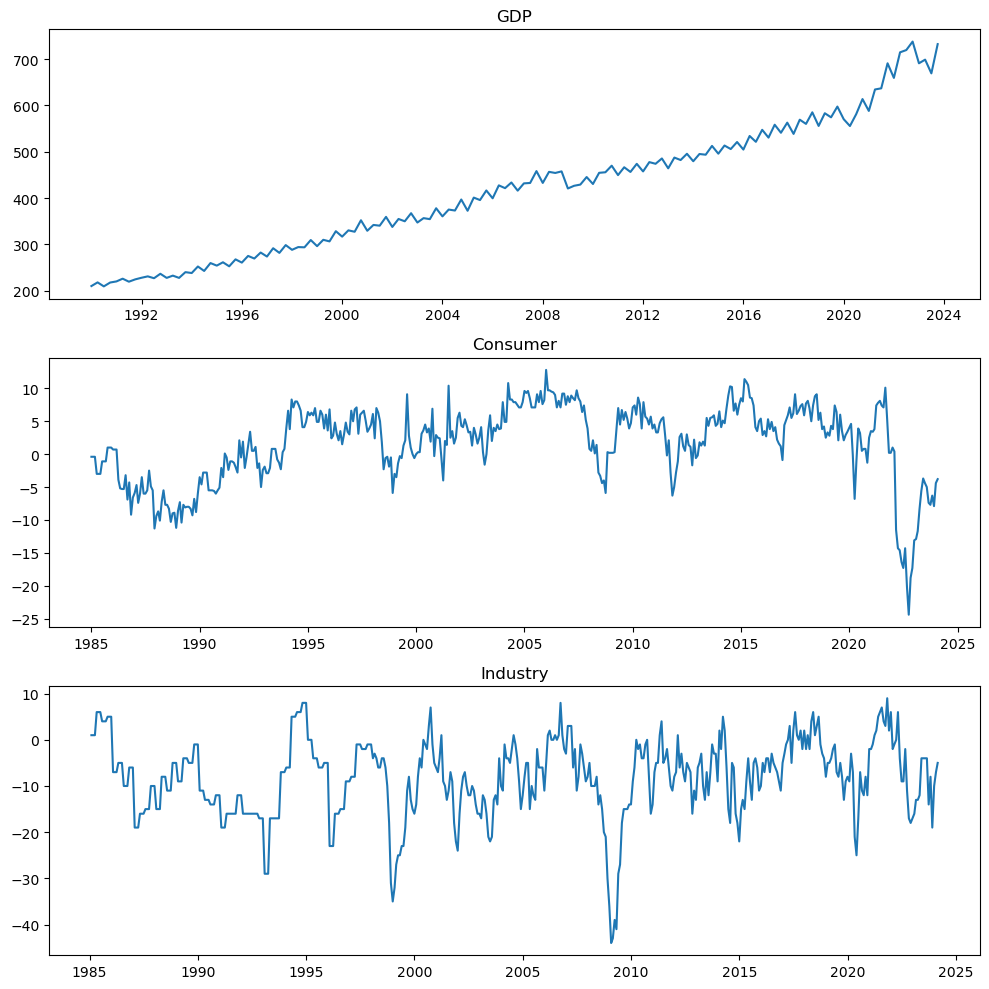

Value           float64
Time     datetime64[ns]
dtype: object
Value           float64
Time     datetime64[ns]
dtype: object


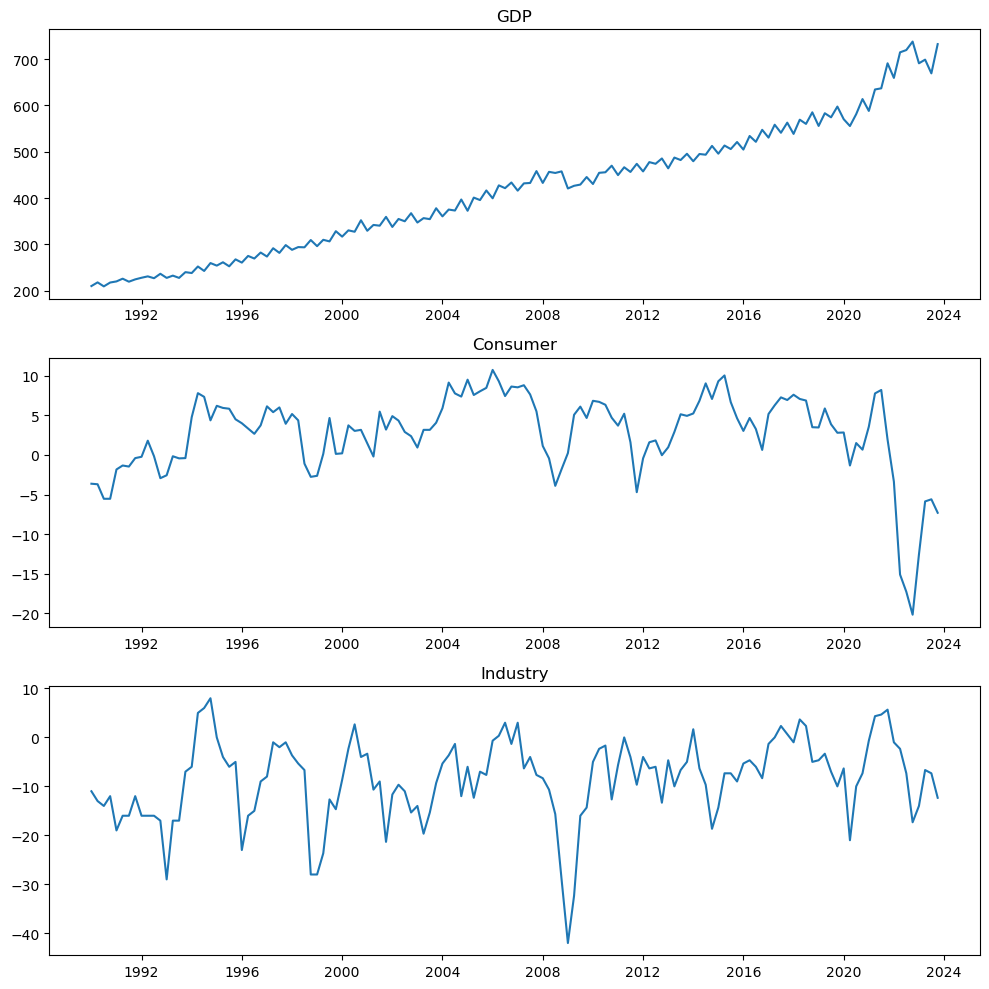

In [21]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

In [22]:
#Using the period 1990-2020 for training and 2021-2023 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2020-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2020-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2020-01-01')]

indu_test = indu[(indu['Time'] >= '2020-01-01') & (indu['Time'] < '2024-01-01')]
cons_test = cons[(cons['Time'] >= '2020-01-01') & (cons['Time'] < '2024-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2020-01-01') & (gdp['Time'] < '2024-01-01')]

#Printing the length of the training and testing data
print("indu lenght: ", len(indu_train), " cons lenght: ", len(cons_train)," gdp lenght: ", len(gdp_train))
print("indu lenght: ", len(indu_test), " cons lenght: ", len(cons_test)," gdp lenght: ", len(gdp_test))

indu lenght:  120  cons lenght:  120  gdp lenght:  120
indu lenght:  16  cons lenght:  16  gdp lenght:  16


In [23]:
from statsmodels.tsa.stattools import adfuller

# Perform augmented Dickey-Fuller test for gdp
adf_gdp = adfuller(gdp_train['Value'])
print("Augmented Dickey-Fuller test for GDP:")
print("ADF Statistic:", adf_gdp[0])
print("p-value:", adf_gdp[1])
print("Critical Values:")
for key, value in adf_gdp[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for indu
adf_indu = adfuller(indu_train['Value'])
print("\nAugmented Dickey-Fuller test for Industry:")
print("ADF Statistic:", adf_indu[0])
print("p-value:", adf_indu[1])
print("Critical Values:")
for key, value in adf_indu[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for cons
adf_cons = adfuller(cons_train['Value'])
print("\nAugmented Dickey-Fuller test for Consumer:")
print("ADF Statistic:", adf_cons[0])
print("p-value:", adf_cons[1])
print("Critical Values:")
for key, value in adf_cons[4].items():
    print(key, ":", value)

#GDP is not stationary, but Industry and Consumption is. We will difference all variables to make it stationary.

Augmented Dickey-Fuller test for GDP:
ADF Statistic: 0.2901945654714323
p-value: 0.9768901194184839
Critical Values:
1% : -3.4936021509366793
5% : -2.8892174239808703
10% : -2.58153320754717

Augmented Dickey-Fuller test for Industry:
ADF Statistic: -4.1384301647583515
p-value: 0.0008361648032987958
Critical Values:
1% : -3.489057523907491
5% : -2.887246327182993
10% : -2.5804808802708528

Augmented Dickey-Fuller test for Consumer:
ADF Statistic: -3.311443444813459
p-value: 0.014374637247979454
Critical Values:
1% : -3.489589552580676
5% : -2.887477210140433
10% : -2.580604145195395


In [24]:
#Differencing the data for both training and testing
gdp_train['diff'] = gdp_train['Value'].diff()
cons_train['diff'] = cons_train['Value'].diff()
indu_train['diff'] = indu_train['Value'].diff()

gdp_test['diff'] = gdp_test['Value'].diff()
cons_test['diff'] = cons_test['Value'].diff()
indu_test['diff'] = indu_test['Value'].diff()

In [25]:
#Checking if the differencing made the data stationary
# Perform augmented Dickey-Fuller test for gdp
adf_gdp = adfuller(gdp_train['diff'].dropna())
print("Augmented Dickey-Fuller test for GDP:")
print("ADF Statistic:", adf_gdp[0])
print("p-value:", adf_gdp[1])
print("Critical Values:")
for key, value in adf_gdp[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for indu
adf_indu = adfuller(indu_train['diff'].dropna())
print("\nAugmented Dickey-Fuller test for Industry:")
print("ADF Statistic:", adf_indu[0])
print("p-value:", adf_indu[1])
print("Critical Values:")
for key, value in adf_indu[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for cons
adf_cons = adfuller(cons_train['diff'].dropna())
print("\nAugmented Dickey-Fuller test for Consumer:")
print("ADF Statistic:", adf_cons[0])
print("p-value:", adf_cons[1])
print("Critical Values:")
for key, value in adf_cons[4].items():
    print(key, ":", value)

#The variables are now stationary.

Augmented Dickey-Fuller test for GDP:
ADF Statistic: -3.7072822151143434
p-value: 0.004011881474249835
Critical Values:
1% : -3.4936021509366793
5% : -2.8892174239808703
10% : -2.58153320754717

Augmented Dickey-Fuller test for Industry:
ADF Statistic: -5.785490092961772
p-value: 5.010838647861559e-07
Critical Values:
1% : -3.4912451337340342
5% : -2.8881954545454547
10% : -2.5809876033057852

Augmented Dickey-Fuller test for Consumer:
ADF Statistic: -6.2527313703285285
p-value: 4.4136131577987084e-08
Critical Values:
1% : -3.4901313156261384
5% : -2.8877122815688776
10% : -2.5807296460459184


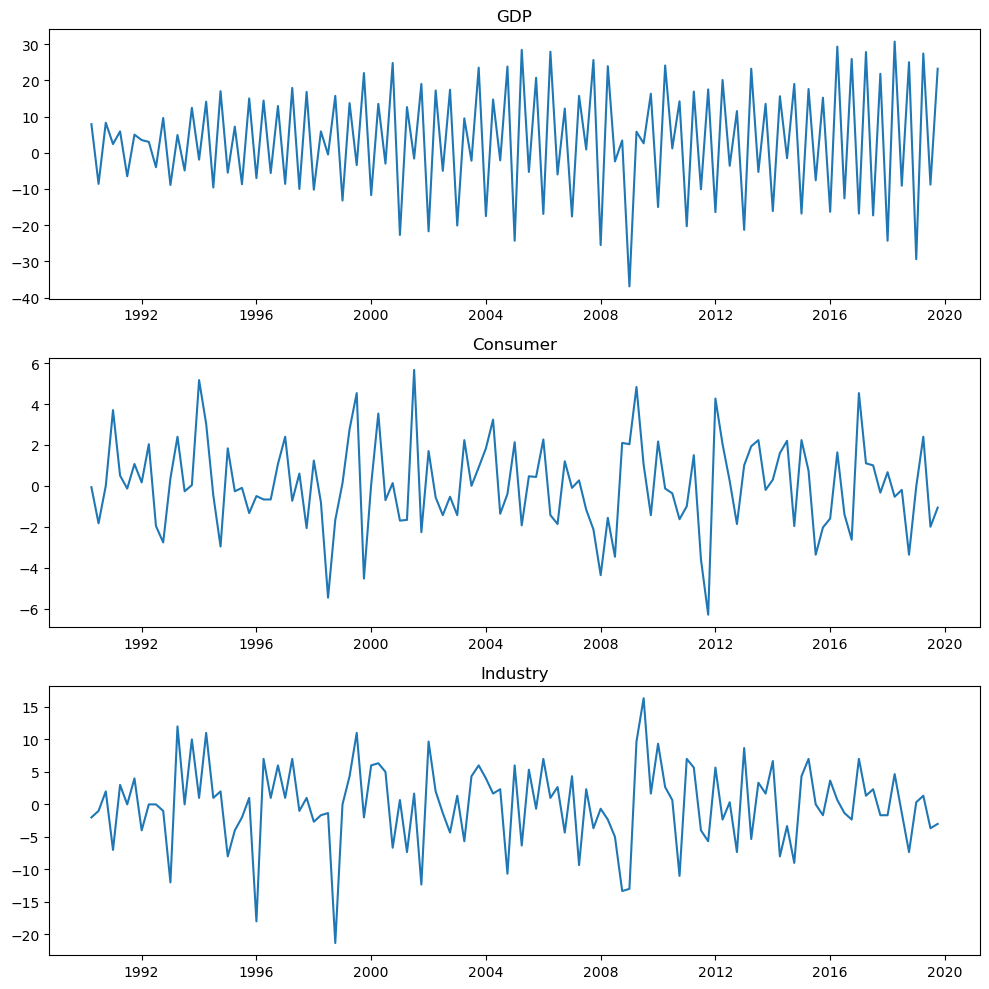

In [26]:
#Plotting the differenced data
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plotting gdp
axs[0].plot(gdp_train['Time'], gdp_train['diff'])
axs[0].set_title('GDP')

# Plotting cons
axs[1].plot(cons_train['Time'], cons_train['diff'])
axs[1].set_title('Consumer')

# Plotting indu
axs[2].plot(indu_train['Time'], indu_train['diff'])
axs[2].set_title('Industry')

# Adjusting the layout
plt.tight_layout()

# Display the plots
plt.show()

In [27]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value  diff
0   1990-01-01  210.2   NaN
1   1990-04-01  218.1   7.9
2   1990-07-01  209.5  -8.6
3   1990-10-01  217.8   8.3
4   1991-01-01  220.2   2.4
..         ...    ...   ...
115 2018-10-01  585.2  25.0
116 2019-01-01  555.8 -29.4
117 2019-04-01  583.2  27.4
118 2019-07-01  574.4  -8.8
119 2019-10-01  597.6  23.2

[120 rows x 3 columns]
        Value       Time      diff
20  -3.633333 1990-01-01       NaN
21  -3.700000 1990-04-01 -0.066667
22  -5.533333 1990-07-01 -1.833333
23  -5.533333 1990-10-01  0.000000
24  -1.833333 1991-01-01  3.700000
..        ...        ...       ...
135  3.500000 2018-10-01 -3.366667
136  3.466667 2019-01-01 -0.033333
137  5.866667 2019-04-01  2.400000
138  3.866667 2019-07-01 -2.000000
139  2.800000 2019-10-01 -1.066667

[120 rows x 3 columns]
         Value       Time      diff
20  -11.000000 1990-01-01       NaN
21  -13.000000 1990-04-01 -2.000000
22  -14.000000 1990-07-01 -1.000000
23  -12.000000 1990-10-01  2.000000
24  -19.000000 1

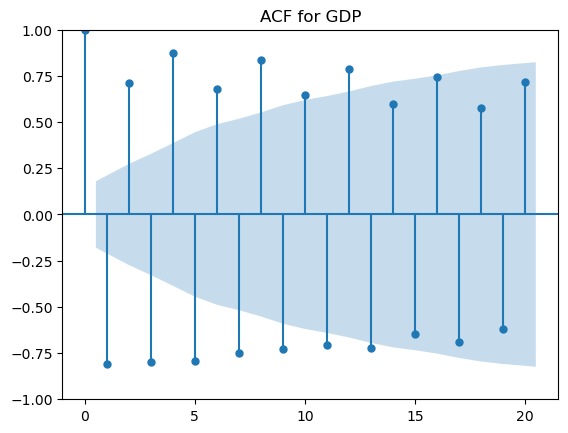

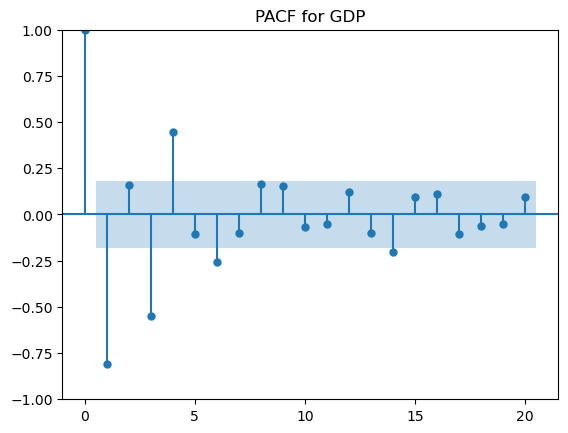

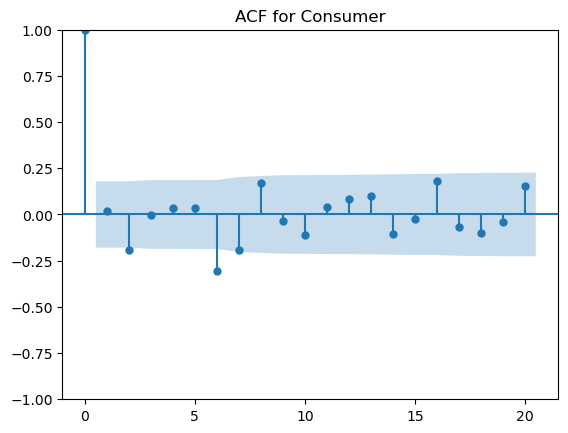

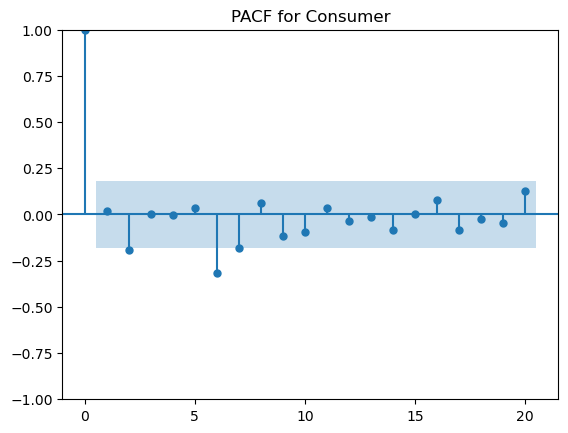

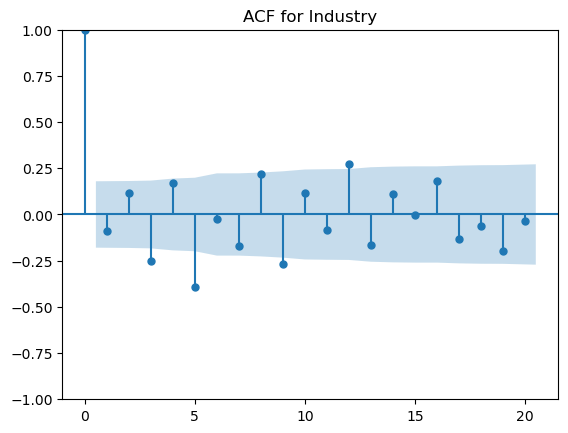

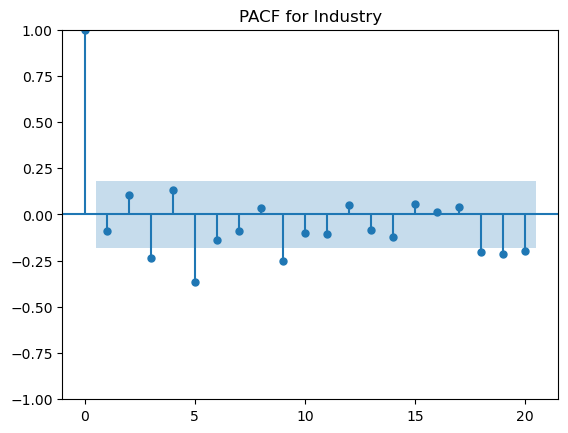

In [28]:
#Checking the data's acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF for gdp
plot_acf(gdp_train['diff'].dropna(), lags=20)
plt.title('ACF for GDP')
plt.show()

# Plot the PACF for gdp
plot_pacf(gdp_train['diff'].dropna(), lags=20)
plt.title('PACF for GDP')
plt.show()

# Plot the ACF for cons
plot_acf(cons_train['diff'].dropna(), lags=20) 
plt.title('ACF for Consumer')
plt.show()

# Plot the PACF for cons
plot_pacf(cons_train['diff'].dropna(), lags=20)
plt.title('PACF for Consumer')
plt.show()

# Plot the ACF for indu
plot_acf(indu_train['diff'].dropna(), lags=20)
plt.title('ACF for Industry')
plt.show()

# Plot the PACF for indu
plot_pacf(indu_train['diff'].dropna(), lags=20)
plt.title('PACF for Industry')
plt.show()

#gdp shows significant lags until around 12.
#cons do not show significant lags.
#indu do not show significant lags.

In [29]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train['Value'].dropna() , cons_train['Value'].dropna()], axis=1)
exog.columns = ['Value_indu', 'Value_cons']

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Create a list of all possible combinations of p, d, and q
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and its AIC value
best_model = None
best_aic = float('inf')

# Iterate over all combinations of p, d, and q
for params in param_combinations:
    try:
        # Create the ARIMA model with the current parameters
        model = ARIMA(gdp_train['Value'].dropna(), order=params, exog=exog)
        
        # Fit the model
        model_fit = model.fit()
        
        # Get the AIC value of the model
        aic = model_fit.aic
        
        # Check if the current model has a lower AIC value than the best model so far
        if aic < best_aic:
            best_model = model_fit
            best_aic = aic
    except:
        continue

# Print the summary of the best model
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  120
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -402.039
Date:                Sun, 24 Mar 2024   AIC                            816.078
Time:                        11:45:48   BIC                            832.702
Sample:                             0   HQIC                           822.828
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Value_indu     0.1689      0.099      1.703      0.089      -0.025       0.363
Value_cons    -0.6720      0.289     -2.321      0.020      -1.239      -0.105
ar.L1         -0.9985      0.004   -227.397      0.0

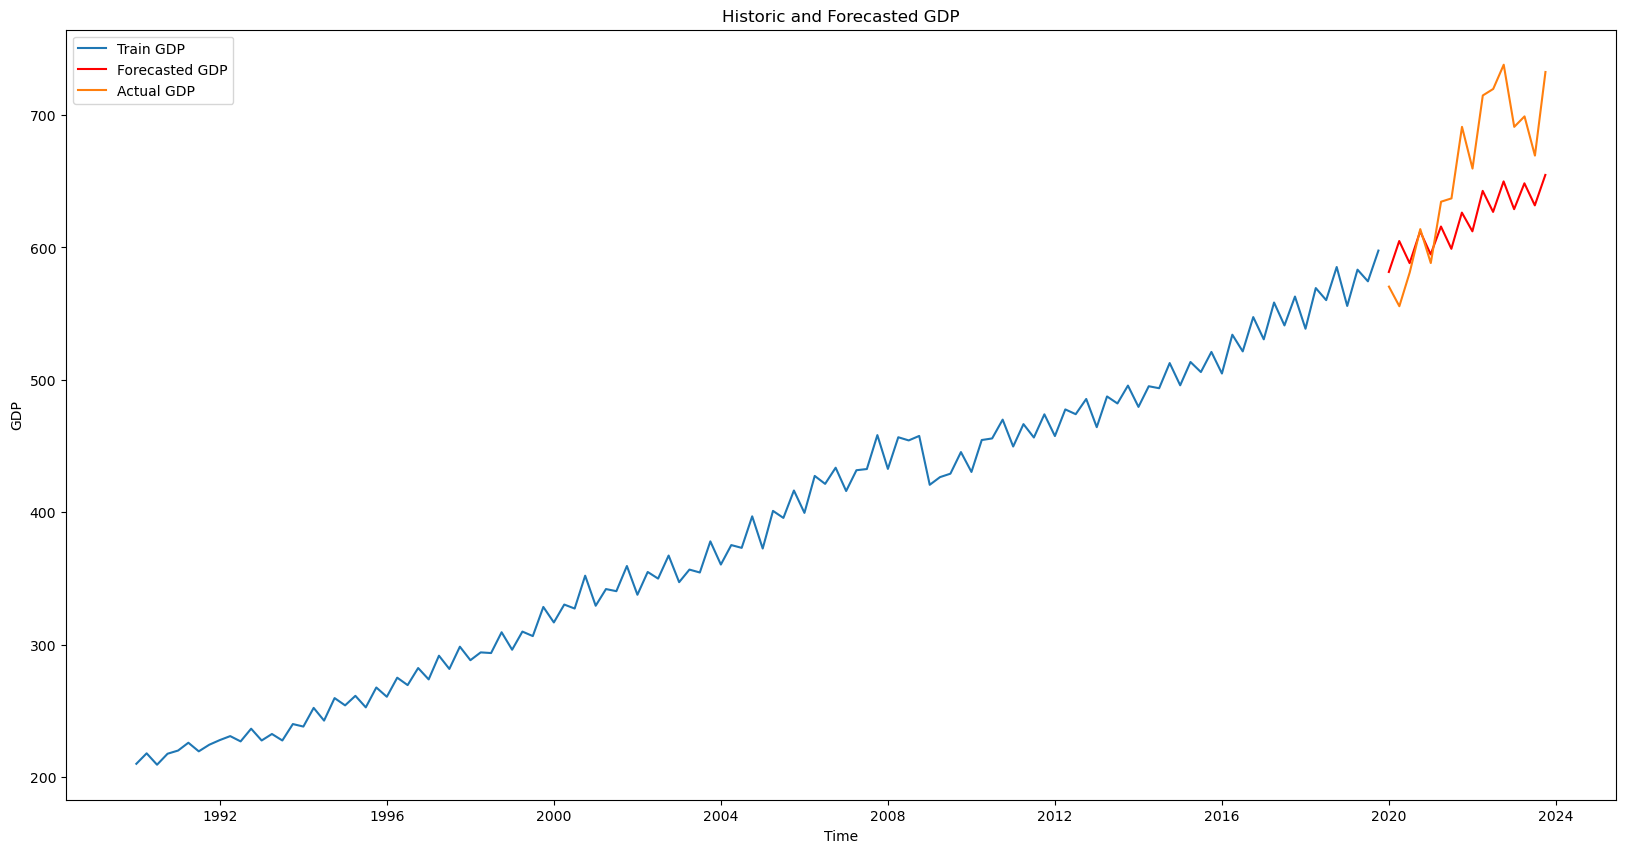

In [30]:
# Forecast 16 quarters ahead based on test indu and cons
fut_exog = pd.concat([indu_test['Value'].dropna(), cons_test['Value'].dropna()], axis=1)
fut_exog.columns = ['Value_indu', 'Value_cons']

forecast = model_fit.get_forecast(steps=16, exog=fut_exog.iloc[-16:])

# Get the forecasted values
forecast_values = forecast.predicted_mean

# Define the forecast dates
forecast_dates = pd.date_range(start=gdp_train['Time'].iloc[-1], periods=16, freq='QE')

# Plotting the forecasted values
# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [31]:
#Comparing the forecasted values with the actual values trough RMSE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)

# Print the RMSE
print("The RMSE is", rmse_value)

#The RMSE is 54, which is quite high. This is likely due to the fact that the model is not very good at predicting the GDP in the period 2020 - 2023. This is likely due to the COVID-19 pandemic, which has caused a lot of uncertainty in the economy. The model is not able to capture this uncertainty, and therefore the forecast is not very accurate.

The RMSE is 53.785565696386854
